In [3]:
import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import rc
import plotly.graph_objs as go
from sklearn import preprocessing
import matplotlib
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
import math
from sklearn.metrics import mean_squared_error as MSE
from sklearn import tree
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO
from IPython.display import Image
# import pydotplus
from sklearn.ensemble import RandomForestRegressor
import missingno as msno

In [5]:
#df = pd.read_csv('/Users/reema/Desktop/ML/vehicles.csv')

In [4]:
df = pd.read_csv('/Users/soaadaljafr/Downloads/vehicles.csv')

In [ ]:
## EDA
### Data Exploring:

In [5]:
df.sample(6)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
321764,7317019482,https://portland.craigslist.org/mlt/ctd/d/2014...,portland,https://portland.craigslist.org,55999,2014.0,toyota,land cruiser 4x4,excellent,8 cylinders,...,NaN,SUV,black,https://images.craigslist.org/00r0r_iqTI7BfmtR...,MS MOTORS 503-805-0976 WE ARE BY APPOINTMENT O...,NaN,or,NaN,NaN,2021-05-04T16:43:41-0700
27608,7311070687,https://fresno.craigslist.org/cto/d/dinuba-200...,fresno / madera,https://fresno.craigslist.org,11500,2003.0,toyota,tacoma,good,6 cylinders,...,NaN,NaN,NaN,https://images.craigslist.org/00r0r_UGkg1Nlxjz...,2003 Toyota Tacoma xtra cab 158k miles Power w...,NaN,ca,36.534900,-119.390900,2021-04-22T14:31:17-0700
162767,7309619385,https://omaha.craigslist.org/cto/d/redwood-fal...,omaha / council bluffs,https://omaha.craigslist.org,15000,2015.0,toyota,rav4 awd,excellent,4 cylinders,...,mid-size,SUV,blue,https://images.craigslist.org/00x0x_cg0qSlREYd...,I just bought a brand new Toyota Tundra pickup...,NaN,ia,44.539400,-95.116900,2021-04-19T20:50:27-0500
213221,7315104669,https://mankato.craigslist.org/cto/d/freeborn-...,mankato,https://mankato.craigslist.org,4800,2002.0,rover,NaN,excellent,8 cylinders,...,full-size,offroad,black,https://images.craigslist.org/00B0B_dvyY4i2u9C...,~2002 Land Rover Range Rover 4.6 HSE Sport Uti...,NaN,mn,43.823141,-93.604181,2021-04-30T18:58:40-0500
121497,7316739579,https://atlanta.craigslist.org/atl/ctd/d/2013-...,atlanta,https://atlanta.craigslist.org,0,2013.0,NaN,JUST TOO EASY!,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00t0t_5UaUTn7loH...,🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗✍🏽✍🏽...,NaN,ga,33.949600,-83.994200,2021-05-04T11:35:03-0400
309368,7310514816,https://tulsa.craigslist.org/ctd/d/clinton-tou...,tulsa,https://tulsa.craigslist.org,49628,2019.0,ford,f-150,NaN,NaN,...,NaN,pickup,black,https://images.craigslist.org/00d0d_8l6sIIehgm...,➔ Want to see more pictures?Paste this link to...,NaN,ok,38.401800,-93.785000,2021-04-21T15:00:27-0500


In [ ]:
## Data Cleaning:

In [6]:
df.isnull().sum().to_frame()

,0
id,0
url,0
region,0
region_url,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678


In [8]:
df.drop(['id', 'url','region_url', 'VIN', 'image_url', 'lat', 'long', 'description'], axis=1, inplace=True)

In [ ]:
df.isnull().sum())

In [9]:
null_val = df.isna().sum()
def na_filter(na, threshold = .55): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/df.shape[0]<threshold:
            col_pass.append(i)
    return col_pass
used_cars = df[na_filter(null_val)]
used_cars.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state', 'posting_date'],
      dtype='object')

In [10]:
used_cars.manufacturer.unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

In [11]:
used_cars.model.unique()

array([nan, 'sierra 1500 crew cab slt', 'silverado 1500', ...,
       'gand wagoneer', '96 Suburban', 'Paige Glenbrook Touring'],
      dtype=object)

In [12]:
used_cars1 = used_cars.dropna()

In [13]:
used_cars1.shape

(115988, 16)

In [14]:
used_cars1 = used_cars1[used_cars1['price']>0]

In [18]:
y = used_cars1['price']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
removed_outliers

31         True
32         True
33         True
34         True
35         True
          ...  
426859    False
426860     True
426866     True
426874     True
426878     True
Name: price, Length: 111636, dtype: bool

In [19]:
print(removed_outliers.value_counts())

True     100768
False     10868
Name: price, dtype: int64


In [20]:
index_names = used_cars1[~removed_outliers].index # INVERT removed_outliers!!
print(index_names)

Int64Index([   105,    260,    339,    342,    346,    365,    410,    413,
               437,    439,
            ...
            426773, 426774, 426775, 426776, 426778, 426798, 426800, 426857,
            426858, 426859],
           dtype='int64', length=10868)


In [21]:
used_cars1.drop(index_names, inplace=True)

In [22]:
used_cars1 = used_cars1[['price','region','year','manufacturer','model','cylinders','fuel','odometer','title_status','transmission','drive','type','paint_color','state']]

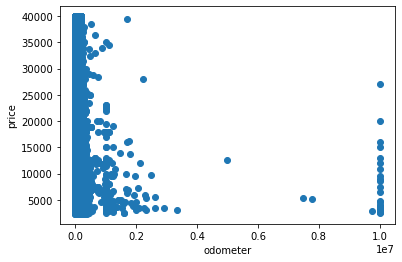

In [27]:
y = used_cars1['price']
x = used_cars1['odometer']
plt.scatter(x, y)
plt.xlabel('odometer')
plt.ylabel('price')
plt.show()

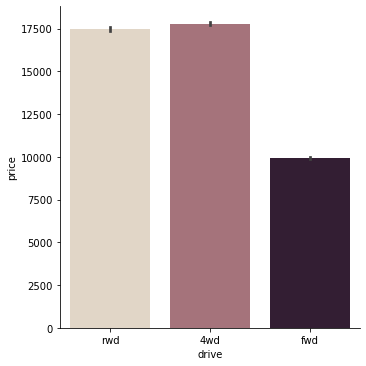

In [26]:
sns.catplot(x="drive", y="price",kind="bar", palette="ch:.25", data=used_cars1)

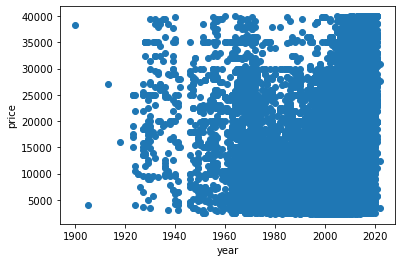

In [24]:
y = used_cars1['price']
x = used_cars1['year']
plt.scatter(x, y)
plt.xlabel('year')
plt.ylabel('price')
plt.show()

In [23]:
le = preprocessing.LabelEncoder()

In [29]:
used_cars1[['region','manufacturer','model','cylinders','fuel','title_status','transmission','drive'
,'type','paint_color','state']] = used_cars1[['region','manufacturer','model','cylinders','fuel','title_status','transmission','drive','type','paint_color','state']].apply(le.fit_transform)



In [31]:
from sklearn.preprocessing import MinMaxScaler
used_cars1["odometer"] = np.sqrt(preprocessing.minmax_scale(used_cars1["odometer"]))

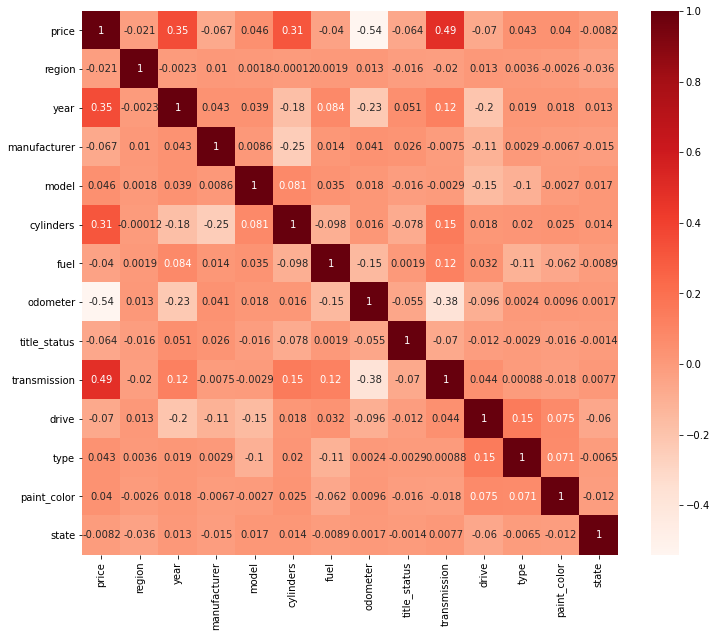

In [32]:
plt.figure(figsize=(12,10))
cor = used_cars1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [33]:
features_p = used_cars1[["drive","odometer","cylinders","fuel","year"]]
target_p = used_cars1[["price"]]

In [35]:
seed=60
df_train, df_test= train_test_split(used_cars1, test_size=0.2, random_state=seed)
df_train, df_val= train_test_split(df_train, test_size=0.2, random_state=seed)
df_train.head()

,price,region,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
48636,33995,285,2010.0,10,2386,6,2,0.047434,0,2,2,9,0,4
208069,29995,243,2017.0,7,8478,6,2,0.083606,0,0,0,8,5,22
370288,15500,72,2011.0,13,8189,6,2,0.121244,0,0,0,10,9,43
202905,4450,128,2006.0,12,4141,5,2,0.141067,0,0,2,10,10,22
44011,8900,262,2007.0,24,6433,3,2,0.083964,0,1,1,4,9,4


In [36]:
X_train1 = df_train.drop(['price'], axis = 1)
y_tran1 = df_train['price']

In [37]:
X_val1 = df_val.drop(['price'], axis = 1)
y_val1 = df_val['price']

In [42]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
poly = PolynomialFeatures(degree=4, include_bias=False, interaction_only=False) 
X_train1_poly = poly.fit_transform(X_train1.values)
poly_model = LinearRegression()

In [44]:
poly_model.fit(X_train1_poly, y_tran1)
print(poly_model.score(X_train1_poly, y_tran1))

-0.27986926177280225


In [45]:
lr = LinearRegression()
lr.fit(X_train1,y_tran1)

print(f"Training Score: {lr.score(X_train1,y_tran1)}")

Training Score: 0.5593787309587197


In [46]:
lr = LinearRegression()
lr.fit(X_val1,y_val1)

print(f"Training Score: {lr.score(X_val1,y_val1)}")

Training Score: 0.5596196782055043


In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [59]:
abmodel = AdaBoostRegressor()
abmodel.fit(X_train1 , y_tran1)
print(abmodel.score(X_train1 , y_tran1))

0.5473201321968184


In [60]:
abmodel = AdaBoostRegressor()
abmodel.fit(X_val1 , y_val1)
print(abmodel.score(X_val1 , y_val1))

0.6017335088472701


In [ ]:
Ridg

In [61]:
scaler = StandardScaler()

X_train1_scaled = scaler.fit_transform(X_train1.values)
#X_test_scaled = scaler.transform(X_test.values)

red_model = Ridge(alpha=1)

In [62]:
red_model.fit(X_train1_scaled, y_tran1)

#print(f'Ridge Regression validation Score: {red_model.score(X_val_scaled, y_val):.8f}')
print(f'Ridge Regression Training Score: {red_model.score(X_train1_scaled, y_tran1):.8f}')

Ridge Regression Training Score: 0.55937873


In [64]:
scaler = StandardScaler()

X_val1_scaled = scaler.fit_transform(X_val1.values)
#X_test_scaled = scaler.transform(X_test.values)

red_model = Ridge(alpha=1)

In [65]:
red_model.fit(X_val1_scaled, y_val1)

#print(f'Ridge Regression validation Score: {red_model.score(X_val_scaled, y_val):.8f}')
print(f'Ridge Regression Training Score: {red_model.score(X_val1_scaled, y_val1):.8f}')

Ridge Regression Training Score: 0.55961968
